In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load the dataset

df = pd.read_csv('C:/Users/xpert/Downloads/churn-bigml-80.csv')
print(df.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [3]:
# Features selection

features = ['Total day minutes', 'Total day charge', 
            'Total eve minutes', 'Total eve charge',
            'Total night minutes', 'Total night charge',
            'Total intl minutes', 'Total intl charge']

x = df[features]
print(x.head())

   Total day minutes  Total day charge  Total eve minutes  Total eve charge  \
0              265.1             45.07              197.4             16.78   
1              161.6             27.47              195.5             16.62   
2              243.4             41.38              121.2             10.30   
3              299.4             50.90               61.9              5.26   
4              166.7             28.34              148.3             12.61   

   Total night minutes  Total night charge  Total intl minutes  \
0                244.7               11.01                10.0   
1                254.4               11.45                13.7   
2                162.6                7.32                12.2   
3                196.9                8.86                 6.6   
4                186.9                8.41                10.1   

   Total intl charge  
0               2.70  
1               3.70  
2               3.29  
3               1.78  
4            

In [4]:
# Standardizing the data

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print("Shape of Standardized data:", x_scaled.shape)
print("First 5 rows (Scaled):\n", x_scaled[:5])

Shape of Standardized data: (2666, 8)
First 5 rows (Scaled):
 [[ 1.57966959  1.57994234 -0.05861885 -0.05844549  0.85740344  0.85670695
  -0.0850203  -0.08568137]
 [-0.32991809 -0.3301935  -0.0959162  -0.09539655  1.04845815  1.04929318
   1.24217895  1.24292063]
 [ 1.17930193  1.179465   -1.55443885 -1.55496337 -0.75966782 -0.75839118
   0.7041252   0.69819381]
 [ 2.21250879  2.21267484 -2.71850874 -2.71892171 -0.08408263 -0.08433938
  -1.30460879 -1.30799521]
 [-0.23582246 -0.23577201 -1.02246087 -1.02148246 -0.28104624 -0.28130257
  -0.04915005 -0.04582331]]


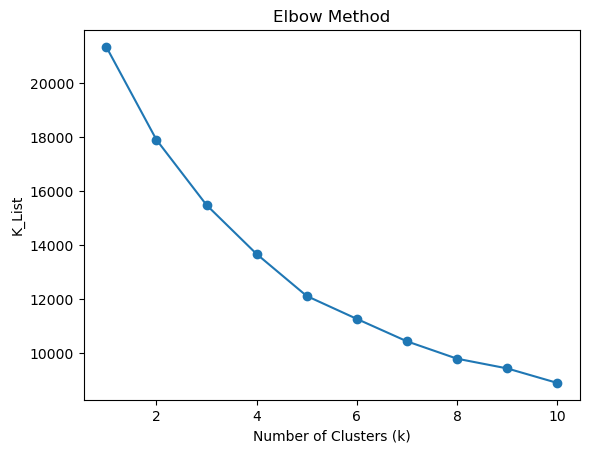

In [5]:
# Elbow Method - To find the best k

k_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(x_scaled)
    k_list.append(kmeans.inertia_)

# Plot the Elbow curve

plt.plot(range(1, 11), k_list, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("K_List")
plt.title("Elbow Method")
plt.show()

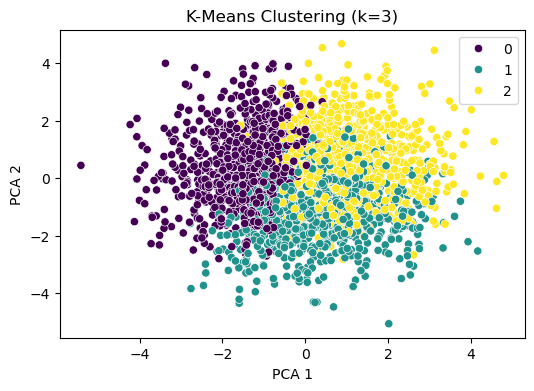

In [10]:
# Fit k-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

# Attach cluster labels to dataset
df['Cluster'] = y_kmeans

# Apply PCA to the scaled data
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Visualize Clusters - 2D scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y_kmeans, palette='viridis')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means Clustering (k=3)")
plt.show()